# **Diabetes Predicting**

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score , f1_score , classification_report

plt.style.use('fivethirtyeight')
import warnings

In [108]:
data = pd.read_csv('diabetes.csv')

## 1- Explore Data

In [109]:
data.head()
data.tail()
data.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
14,5,166,72,19,175,25.8,0.587,51,1


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [111]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [112]:
data.duplicated().sum()

np.int64(0)

## 2- Analysis

In [113]:
cor =data.corr()

<Axes: >

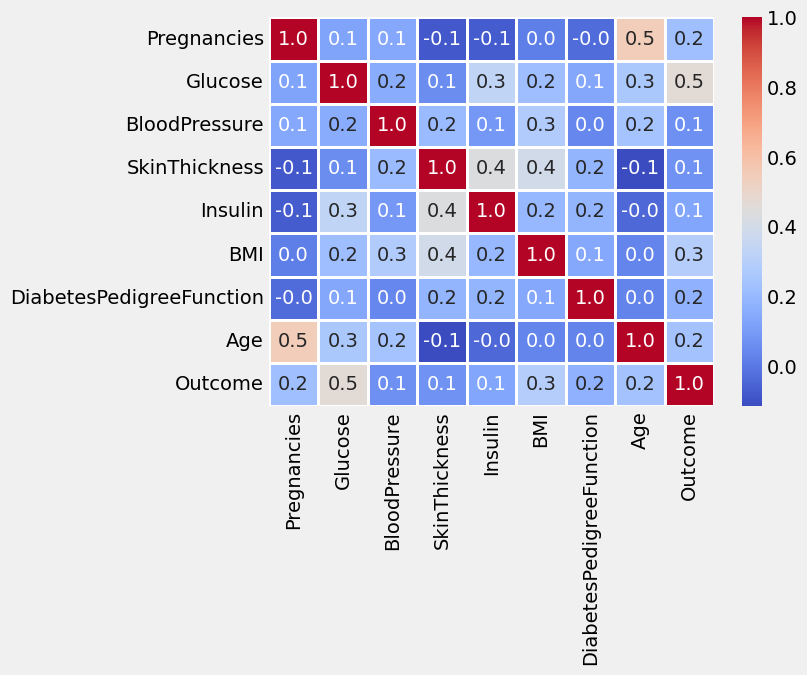

In [114]:
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=2,fmt='.1f')

/tmp/ipython-input-2266246965.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data,palette=['g','r'])


<Axes: xlabel='Outcome', ylabel='count'>

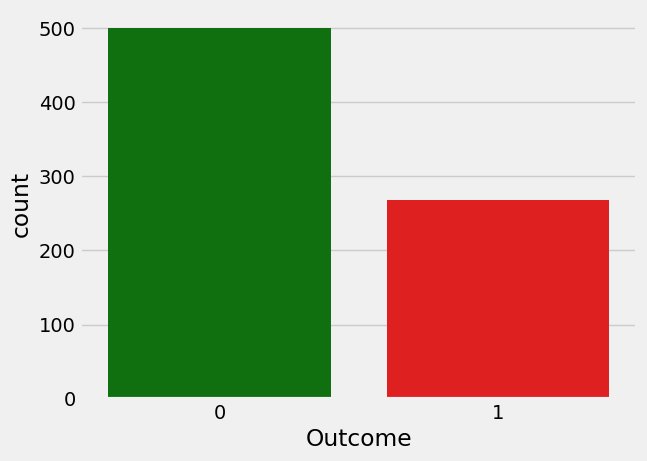

In [115]:
sns.countplot(x='Outcome', data=data,palette=['g','r'])

In [116]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

/tmp/ipython-input-2731034241.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Pregnancies'])


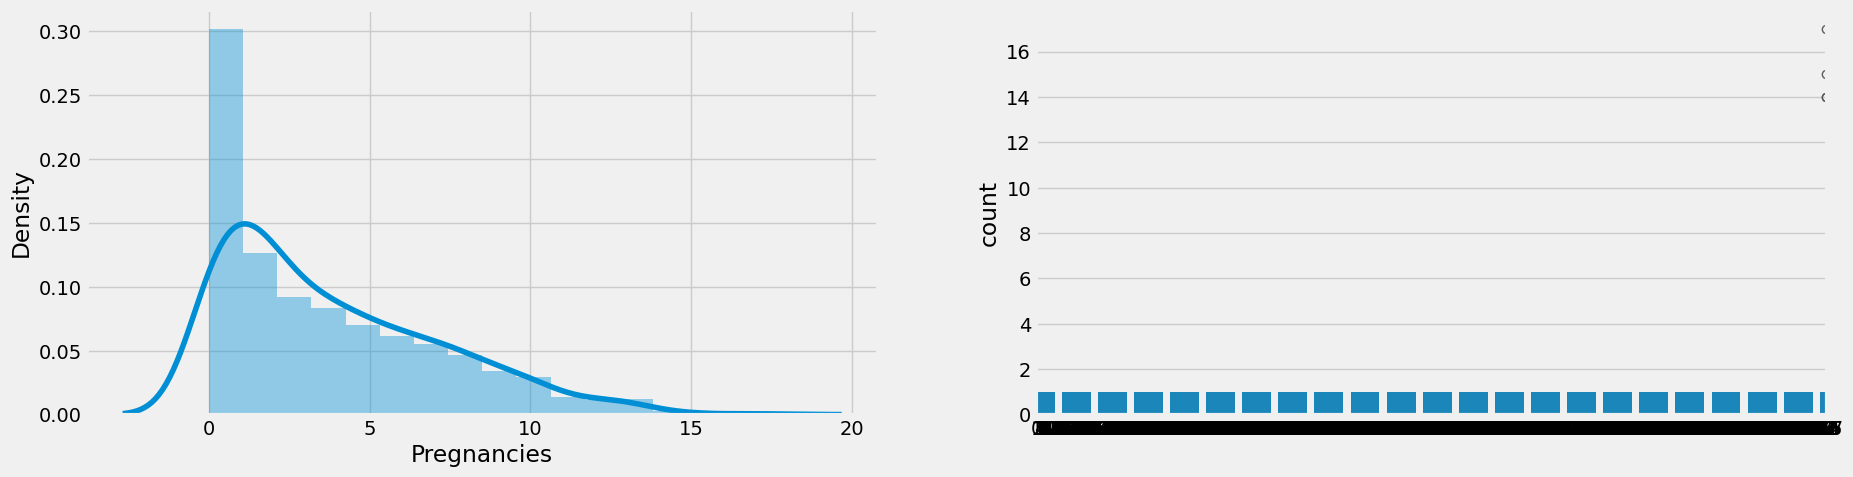

In [117]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(data['Pregnancies'])

plt.subplot(1,2,2)
sns.countplot(data['Pregnancies'])

sns.boxplot(data['Pregnancies'])



plt.show()

<Axes: ylabel='Age'>

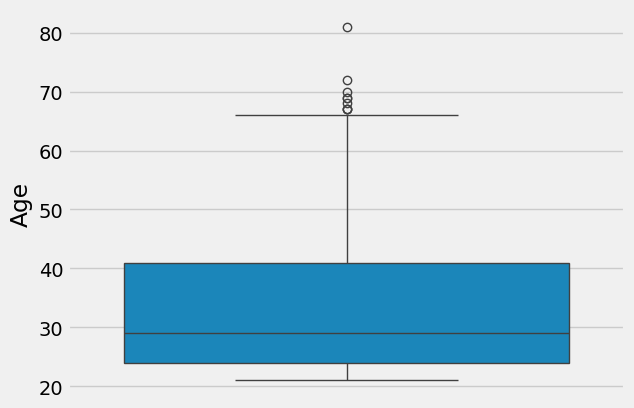

In [118]:
sns.boxplot(data.Age)

## 3- Creat Model

In [119]:
x=data.drop('Outcome',axis=1) # all data exept the 'outcome' (Target)
y=data['Outcome']  # Target

In [120]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [121]:
model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier()
model4=GradientBoostingClassifier(n_estimators=100)
model1.fit(x_train,y_train)  # train the model -->  x =Features , y =Target

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [122]:
columns = ['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifie']
result1=[]
result2=[]
result3=[]

In [123]:
pre=model1.predict(x_test)  # result of predict (x-test)

In [124]:
# to show how accuracy the model predict the data right..?
accuracy_score(y_test,pre)

0.7402597402597403

In [125]:
recall_score(y_test,pre)

0.6545454545454545

In [126]:
f1_score(y_test,pre)

0.6428571428571429

<Axes: >

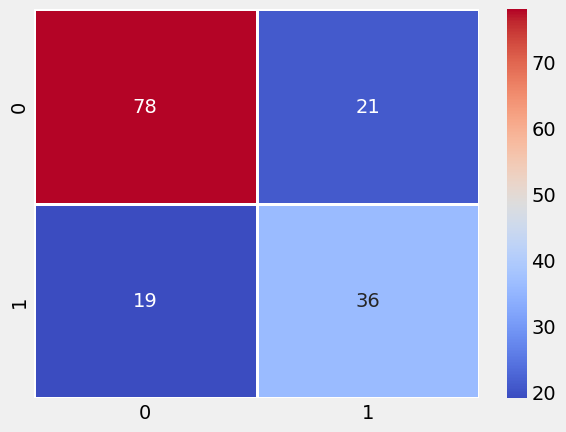

In [127]:
confusion_matrix(y_test,pre)
sns.heatmap(confusion_matrix(y_test,pre),annot=True,cmap='coolwarm',linewidths=2)

In [128]:
def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    print('accuracy_score : ',accuracy_score(y_test,pre))
    print('recall_score : ',recall_score(y_test,pre))
    print('f1_score : ',f1_score(y_test,pre))
    print('classification_report : \n',classification_report(y_test,pre))

    result1.append(accuracy_score(y_test,pre))
    result2.append(recall_score(y_test,pre))
    result3.append(f1_score(y_test,pre))



print('model1= ',cal(model1),'\n')
print('model2= ',cal(model2),'\n')
print('model3= ',cal(model3),'\n')
print('model4= ',cal(model4),'\n')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score :  0.7402597402597403
recall_score :  0.6545454545454545
f1_score :  0.6428571428571429
classification_report : 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

model1=  None 

accuracy_score :  0.7662337662337663
recall_score :  0.5636363636363636
f1_score :  0.6326530612244898
classification_report : 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

model2=  None 

accuracy_score :  0.7467532467532467
recall_score :  0.6

In [132]:
final=pd.DataFrame({'Algorethims':columns,'LogisticRegression':result1,'SVC':result2,'RandomForestClassifier':result3,'GradientBoostingClassifier':result4})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

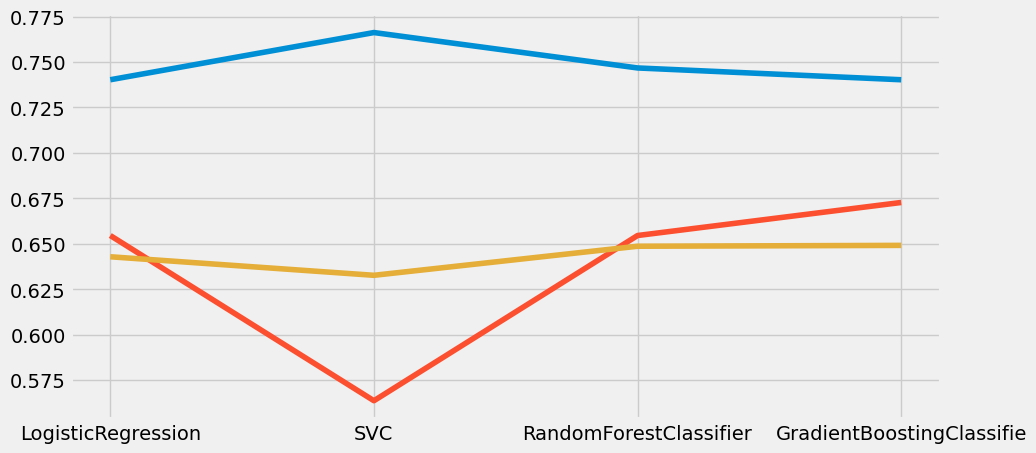

In [133]:
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(final.Algorethims,final.LogisticRegression,label='LogisticRegression')
plt.plot(final.Algorethims,final.SVC,label='SVC')
plt.plot(final.Algorethims,final.RandomForestClassifier,label='RandomForestClassifier')
plt